In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import tarfile
import urllib.request
import math

In [2]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

In [3]:
house_data = load_housing_data()

In [4]:
house_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
house_data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [6]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
house_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
house_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

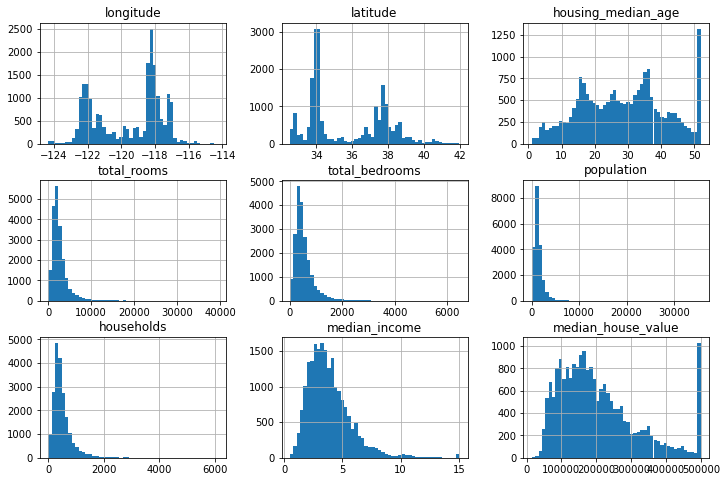

In [9]:
house_data.hist(bins=50, figsize=(12,8))

In [10]:
X = house_data.drop(['median_house_value'], axis = 1)
y = house_data[['median_house_value']]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y) 

In [12]:
house_data.median_income.isnull().sum()

0

In [13]:
house_data['income_cat']= pd.cut(house_data['median_income'],
                                 bins = [0., 1.5, 3.0, 4.5, 6.0, math.inf],
                                 labels=[1,2,3,4,5]
                                )

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

(array([ 822.,    0., 6581.,    0.,    0., 7236.,    0., 3639.,    0.,
        2362.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <BarContainer object of 10 artists>)

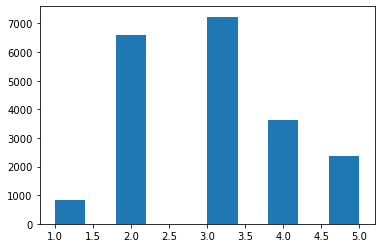

In [15]:
plt.hist(house_data['income_cat'])

In [16]:
house_data.income_cat.isnull().sum()

0

### Stratified Data Splitting

In [17]:
# income_cat_median = hou
# house_data.income_cat.fillna(house_data.income_cat.median())
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   longitude           20640 non-null  float64 
 1   latitude            20640 non-null  float64 
 2   housing_median_age  20640 non-null  float64 
 3   total_rooms         20640 non-null  float64 
 4   total_bedrooms      20433 non-null  float64 
 5   population          20640 non-null  float64 
 6   households          20640 non-null  float64 
 7   median_income       20640 non-null  float64 
 8   median_house_value  20640 non-null  float64 
 9   ocean_proximity     20640 non-null  object  
 10  income_cat          20640 non-null  category
dtypes: category(1), float64(9), object(1)
memory usage: 1.6+ MB


In [18]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(house_data, stratify=house_data['income_cat'], test_size=0.2)

In [19]:
train_set[['income_cat']].value_counts() / len(train_set)

income_cat
3             0.350594
2             0.318859
4             0.176296
5             0.114462
1             0.039789
Name: count, dtype: float64

In [20]:
for set_ in [train_set, test_set]:
    set_.drop(['income_cat'], axis=1, inplace=True)

In [21]:
train_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### Visualizing the data

In [22]:
housing = train_set.copy()

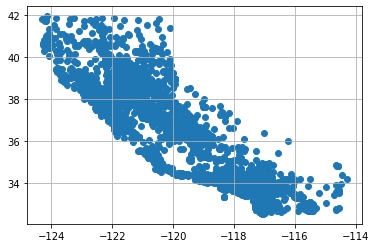

In [23]:
plt.scatter(data = housing, x = 'longitude', y = 'latitude')
plt.grid()
plt.show()

# this indeed look like california

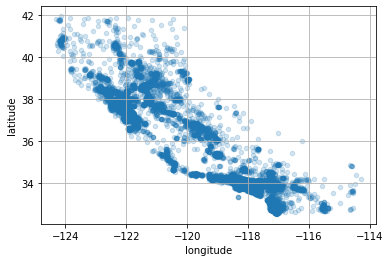

In [24]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha= 0.2, grid = True)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

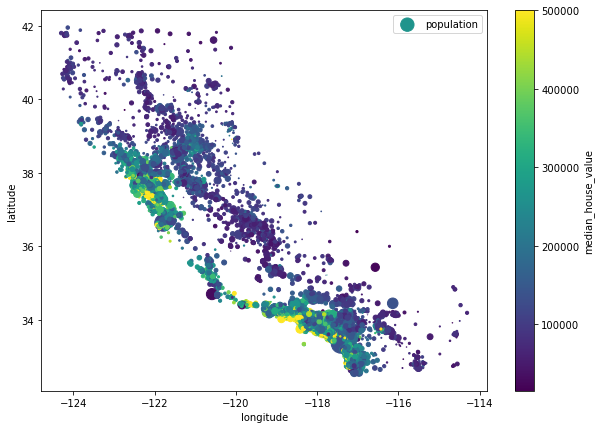

In [25]:
housing.plot(kind = "scatter", x = 'longitude', y = 'latitude', 
             s = housing['population']/ 100, 
             label = "population", 
             c = 'median_house_value', 
             # cmap = "jet",
             colorbar = True,
             sharex= False, 
             figsize = (10, 7)
            )
plt.show

# house value

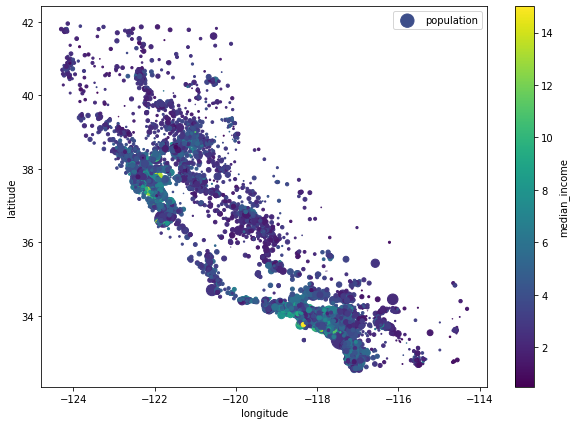

In [26]:
housing.plot(kind = "scatter", x = 'longitude', y = 'latitude', 
             s = housing['population']/ 100, 
             label = "population", 
             c = 'median_income', 
             # cmap = plt.cm.jet,
             colorbar = True,
             sharex= False, 
             figsize = (10, 7)
            )
plt.show()


In [27]:
temp = housing.copy()
temp.drop(['ocean_proximity'], axis = 1, inplace=True)
corr_matrix = temp.corr()

In [28]:
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690212
total_rooms           0.136755
housing_median_age    0.098771
households            0.067925
total_bedrooms        0.051273
population           -0.022059
longitude            -0.047077
latitude             -0.143851
Name: median_house_value, dtype: float64

In [29]:
housing['rooms_per_house'] = housing['total_rooms']/ housing['households']
housing['bedroom_ration'] = housing['total_bedrooms'] / house_data['total_rooms']
housing['people_per_house'] = housing['population'] / housing['households']

In [30]:
temp = housing.copy()
temp.drop(['ocean_proximity'], axis = 1, inplace=True)
corr_matrix = temp.corr()

In [31]:
corr_matrix.median_house_value.sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690212
rooms_per_house       0.146712
total_rooms           0.136755
housing_median_age    0.098771
households            0.067925
total_bedrooms        0.051273
people_per_house     -0.021931
population           -0.022059
longitude            -0.047077
latitude             -0.143851
bedroom_ration       -0.264564
Name: median_house_value, dtype: float64

### Cleaning Data

#### Numerical Data

In [32]:
housing = train_set.drop(['median_house_value'], axis = 1)
housing_label = train_set['median_house_value']

In [33]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [34]:
number_cols = [col for col in housing.columns if housing[col].dtype in ['int64', 'float64']]

In [35]:
housing_num = housing[number_cols]
imputer.fit(housing_num)

X = imputer.transform(housing_num)

In [36]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index = housing_num.index)

#### Categorial Data

In [37]:
housing_cat = house_data[['ocean_proximity']]

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
 
housing_cat_1hot = ohe.fit_transform(housing_cat)

df_output = pd.DataFrame(housing_cat_1hot, columns= ohe.get_feature_names_out())

In [38]:
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
20635,0.0,1.0,0.0,0.0,0.0
20636,0.0,1.0,0.0,0.0,0.0
20637,0.0,1.0,0.0,0.0,0.0
20638,0.0,1.0,0.0,0.0,0.0


In [39]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(house_data[['housing_median_age']], [[35]], gamma= 0.1)

(array([13790.,   757.,     0.,     0.,   780.,     0.,     0.,     0.,
            0.,     0.,   827.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,   959.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1152.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,  1551.,     0.,     0.,
            0.,   824.]),
 array([6.24536596e-51, 2.00000000e-02, 4.00000000e-02, 6.00000000e-02,
        8.00000000e-02, 1.00000000e-01, 1.20000000e-01, 1.40000000e-01,
        1.60000000e-01, 1.80000000e-01, 2.00000000e-01, 2.20000000e-01,
        2.40000000e-01, 2.60000000e-01, 2.80000000e-01, 3.00000000e-01,
        3.20000000e-01, 3.40000000e-01, 3.60000000e-01, 3.80000000e-01,
        4.00000000e-01, 4.20000000e-01, 4.40000000e-01, 4.60000000e-01,
        4.80000000e-01, 5.00000000e-01, 5.20000000e-01, 5.40000000e-01,
        5.60000000e-01, 5.80000000e-01

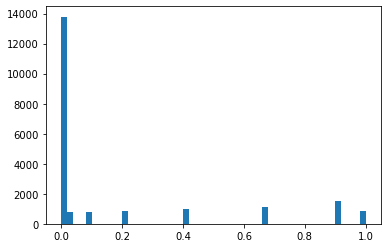

In [40]:
plt.hist(age_simil_35, bins = 50)

In [41]:
from sklearn.preprocessing import StandardScaler
target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(pd.DataFrame(housing_label))

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing[['median_income']], 
          scaled_labels
         )

some_new_data = housing[["median_income"]].iloc[:5] # pretend this is new data
scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)
predictions

## A better Alternative

array([[207839.1844933 ],
       [148025.58044956],
       [492380.5071835 ],
       [164542.86537282],
       [195290.55494195]])

In [42]:
from sklearn.compose import TransformedTargetRegressor
model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())

model.fit(housing[['median_income']], housing_label)
predictions_auto = model.predict(some_new_data)
predictions_auto

array([207839.1844933 , 148025.58044956, 492380.5071835 , 164542.86537282,
       195290.55494195])

In [43]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log,inverse_func= np.exp)
log_pop = log_transformer.fit_transform(housing[['population']])

(array([1.5856e+04, 5.6700e+02, 7.2000e+01, 1.1000e+01, 4.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([3.00000e+00, 3.57090e+03, 7.13880e+03, 1.07067e+04, 1.42746e+04,
        1.78425e+04, 2.14104e+04, 2.49783e+04, 2.85462e+04, 3.21141e+04,
        3.56820e+04]),
 <BarContainer object of 10 artists>)

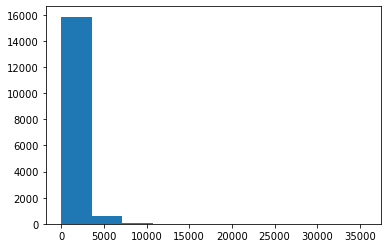

In [44]:
plt.hist(housing['population'])

(array([3.000e+00, 1.900e+01, 7.400e+01, 1.490e+02, 5.100e+02, 3.903e+03,
        9.327e+03, 2.334e+03, 1.870e+02, 6.000e+00]),
 array([ 1.09861229,  2.03699122,  2.97537016,  3.91374909,  4.85212803,
         5.79050696,  6.7288859 ,  7.66726483,  8.60564377,  9.5440227 ,
        10.48240164]),
 <BarContainer object of 10 artists>)

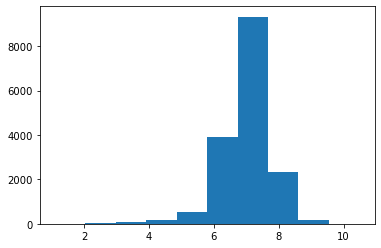

In [45]:
plt.hist(log_pop)

In [46]:
rbf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y = [[35]], gamma = 0.2))

age_simil_35 = rbf_transformer.transform(housing[["housing_median_age"]])

(array([12909.,   772.,     0.,     0.,   909.,     0.,     0.,     0.,
         1262.,   660.]),
 array([3.9004596e-101, 1.0000000e-001, 2.0000000e-001, 3.0000000e-001,
        4.0000000e-001, 5.0000000e-001, 6.0000000e-001, 7.0000000e-001,
        8.0000000e-001, 9.0000000e-001, 1.0000000e+000]),
 <BarContainer object of 10 artists>)

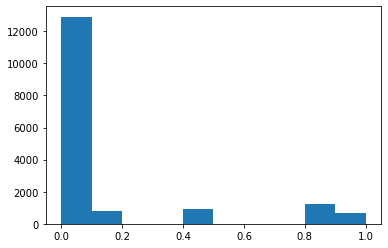

In [47]:
plt.hist(age_simil_35)

In [48]:
sf_coords = 37.7749, -122.41
sf_transformer = FunctionTransformer(rbf_kernel, kw_args=dict(Y = [sf_coords], gamma = 0.1))
sf_simil = sf_transformer.fit_transform(housing[['latitude', 'longitude']])

(array([8727.,  495.,  311.,  407.,  603.,  145.,  363.,  455., 1349.,
        3657.]),
 array([1.74615700e-04, 1.00156914e-01, 2.00139212e-01, 3.00121511e-01,
        4.00103809e-01, 5.00086107e-01, 6.00068406e-01, 7.00050704e-01,
        8.00033002e-01, 9.00015301e-01, 9.99997599e-01]),
 <BarContainer object of 10 artists>)

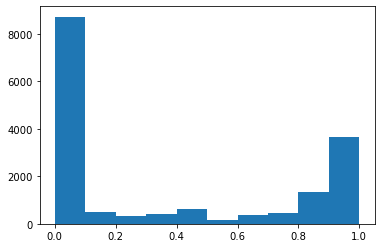

In [49]:
plt.hist(sf_simil)

### Feature engineering using function transformers

In [50]:
ratio_transformer = FunctionTransformer(lambda X: X[:, [0]] / X[:, [1]])
ratio_transformer.transform(np.array([[1., 2.], [3., 4.]]))

array([[0.5 ],
       [0.75]])

In [51]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline # use this to make pipeline without names

# num_pipeline = Pipeline([
#     ("impute", SimpleImputer(strategy="median")),
#     ("standardize", StandardScaler()),
# ])
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [52]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)
housing_num_prepared[:2].round(2)

df_housing_num_prepared = pd.DataFrame(
    housing_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=housing_num.index)

In [53]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))
preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),])

In [54]:
## for convienence sklearn also has colum selector 
from sklearn.compose import make_column_selector, make_column_transformer
# make_column_transforer is same as mmake_pipeline but for cColumnTransformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include='number')),
    (cat_pipeline, make_column_selector(dtype_include='object')),
    )

In [55]:
housing_prepared = preprocessing.fit_transform(housing)

### Clusterings

In [56]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True): # no *args or **kwargs!
        self.with_mean = with_mean
    def fit(self, X, y=None): # y is required even though we don't use it
        X = check_array(X) # checks that X is an array with finite float values
        self.mean_ = X.mean(axis=0)
        self.scale_ = X.std(axis=0)
        self.n_features_in_ = X.shape[1] # every estimator stores this in fit()
        return self # always return self!
    def transform(self, X):
        check_is_fitted(self) # looks for learned attributes (with trailing _)
        X = check_array(X)
        assert self.n_features_in_ == X.shape[1]
        if self.with_mean:
            X = X - self.mean_
        return X / self.scale_

In [57]:
from sklearn.cluster import KMeans
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state
    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self # always return self!
    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [58]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
similarities = cluster_simil.fit_transform(housing[["latitude", "longitude"]],
sample_weight=housing_label)

In [59]:
def column_ratio(X):
    return X[:, [0]] / X[:, [1]]
def ratio_name(function_transformer, feature_names_in):
    return ["ratio"] # feature names out
def ratio_pipeline():
    return make_pipeline(
SimpleImputer(strategy="median"),
FunctionTransformer(column_ratio, feature_names_out=ratio_name),
    StandardScaler())
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
    StandardScaler())
preprocessing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
    ("people_per_house", ratio_pipeline(), ["population", "households"]),
    ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
    "households", "median_income"]),
    ("geo", cluster_simil, ["latitude", "longitude"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline) # one column remaining: housing_median_age

In [60]:
housing_prepared = preprocessing.fit_transform(housing)

In [61]:
housing_prepared.shape

(16512, 24)

In [62]:
preprocessing.get_feature_names_out()

array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'log__total_bedrooms',
       'log__total_rooms', 'log__population', 'log__households',
       'log__median_income', 'geo__Cluster 0 similarity',
       'geo__Cluster 1 similarity', 'geo__Cluster 2 similarity',
       'geo__Cluster 3 similarity', 'geo__Cluster 4 similarity',
       'geo__Cluster 5 similarity', 'geo__Cluster 6 similarity',
       'geo__Cluster 7 similarity', 'geo__Cluster 8 similarity',
       'geo__Cluster 9 similarity', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__housing_median_age'], dtype=object)

In [71]:
from sklearn.linear_model import LinearRegression

liner_reg = make_pipeline(preprocessing, LinearRegression())

liner_reg.fit(housing, housing_label)

liner_reg.score(housing, housing_label)

0.6411489080503034

In [72]:
from sklearn.metrics import mean_squared_error

housing_pred = liner_reg.predict(housing)

housing_pred[:5]

array([243024.,  55656., 451040., 175040., 194912.])

In [73]:
housing_label[:5]

7412     265500.0
6387      88800.0
2237     500001.0
14529     82700.0
13373    124700.0
Name: median_house_value, dtype: float64

In [75]:
lim_rmse = mean_squared_error(housing_label, housing_pred, squared=False)
lim_rmse

/home/anikeet/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


69084.52607891268

In [81]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor)

tree_reg.fit(housing, housing_label)

housing_pred_tree = tree_reg.predict(housing)

tree_rmse = mean_squared_error(housing_label, housing_pred_tree, squared=False)

tree_rmse